In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords #Importing the stopwords to remove the stepwords using nltk stopwords library
from nltk.stem.porter import PorterStemmer #Using porterstemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer #TFIDF vectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #To shuffle the data
from sklearn.pipeline import Pipeline #To organise the pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score

In [4]:
#Tokenizing,stemming and lemitization 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#Importing both the real and fake data
##Quoting = 3 ignores double quotes in reviews as it is not necessary  or helpful to distinguish
true_data = pd.read_csv('true.csv')
fake_data = pd.read_csv('fake.csv')

In [6]:
#First let's add a coloumn called 'True' in the true data and 'False' in fake data
for i in range(len(true_data)):
    true_data['results'] = 'Real'
for i in range(len(fake_data)):
    fake_data['results'] = 'Fake'

In [7]:
#Let's count and plot the subject of the text category
true_subject = true_data['subject'].value_counts()
fake_subject = fake_data['subject'].value_counts()
print(fake_subject)
print('-------*-------')
print(true_subject)
#Looks like there are more subjects on the fake news and less content on the true news

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64
-------*-------
politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


In [8]:
true_data.head()

,title,text,subject,date,results
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


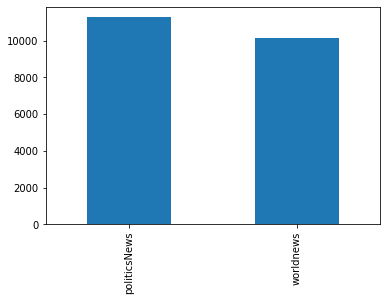

In [9]:
#Plotting the data out
true_subject.plot(kind = 'bar')

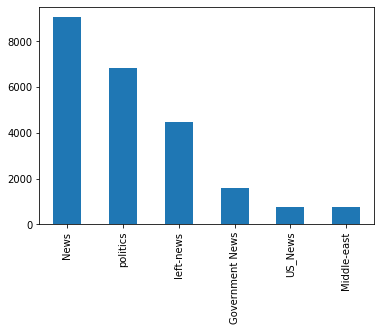

In [10]:
fake_subject.plot(kind = 'bar')

In [11]:
#Joining dtext and title in one column to create the news article
true_data['News'] = true_data['title'] + ' ' + true_data['text']
fake_data['News'] = fake_data['title'] + ' '+ fake_data['text']

In [12]:
#Deleting title and text from both dataframe
del true_data['title']
del true_data['text']
del fake_data['title']
del fake_data['text']
del true_data['date']
del fake_data['date']

In [13]:
#Let's check the number of categories in subject coloumn for true news
true_data['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [14]:
#Let's check the number of categories in subject coloumn for fake news
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [15]:
#Further exploration of the data by seperating the subjects into new dataframe and check the wordcloud in it
#For true news
true_politics = true_data[true_data['subject'] =='politicsNews']
true_world = true_data[true_data['subject'] == 'worldnews']

In [16]:
#Further exploration of the data by seperating the subjects into new dataframe and check the wordcloud in it
#For fake news
fake_news = fake_data[fake_data['subject'] =='News']
fake_politics = fake_data[fake_data['subject'] == 'politics']
fake_leftNews = fake_data[fake_data['subject'] == 'left-news']
fake_govNews = fake_data[fake_data['subject'] == 'Government News']
fake_usNews = fake_data[fake_data['subject'] == 'US_News']
middle_east = fake_data[fake_data['subject'] == 'Middle-east']

In [15]:
ps = PorterStemmer()
lem = WordNetLemmatizer() 
#For tokenization stemming and lemmitization  #Takes alot of time. Check how it can be improved
def tokenize_stem_lemm(string):
    news = re.sub('\[.*?\]', '', string) # remove square brackets
    news = re.sub(r'[^\w\s]','',news) # remove punctuation
    news = re.sub('\w*\d\w*', '', news) # remove words containing numbers
    news = re.sub(r'http\S+', '', news) #Removes links
    news = re.sub('\n', '', news)
    news = nltk.word_tokenize(news) #Creating a tokenizer
    news = [words.lower() for words in news] #Converting all the strings into lowercase
    #news = [ps.stem(words) for words in news if not words in set(stopwords.words('english'))]
    news = [lem.lemmatize(words) for words in news if not words in set(stopwords.words('english'))] #Using lemitization to the words
    news = ' '.join(news) #Reversing it back to non list string as above method 'string' would have stringed 
    return news

In [16]:
#For real news
true_politics['News'] = true_politics['News'].apply(tokenize_stem_lemm)
true_world['News'] = true_world['News'].apply(tokenize_stem_lemm)
#For fake news
fake_news['News'] = fake_news['News'].apply(tokenize_stem_lemm)
fake_politics['News'] = fake_politics['News'].apply(tokenize_stem_lemm)
fake_leftNews['News'] = fake_leftNews['News'].apply(tokenize_stem_lemm)
fake_govNews['News'] = fake_govNews['News'].apply(tokenize_stem_lemm)
fake_usNews['News'] = fake_usNews['News'].apply(tokenize_stem_lemm)
middle_east['News'] = middle_east['News'].apply(tokenize_stem_lemm)

In [17]:
#Combining both fake and real news into new dataframe
news_dataframe = pd.concat([true_politics,true_world,fake_news,fake_politics,fake_leftNews,fake_govNews,fake_usNews,middle_east],axis=0)

In [18]:
# news_dataframe.to_csv('news_dataframe_with_stemming.csv')
news_dataframe.to_csv('news_dataframe_with_lemm.csv')

In [17]:
news_dataframe = pd.read_csv('news_dataframe_with_lemm.csv')

In [18]:
news_dataframe.head()

,Unnamed: 0,subject,results,News
0,0,politicsNews,Real,u budget fight loom republican flip fiscal scr...
1,1,politicsNews,Real,u military accept transgender recruit monday p...
2,2,politicsNews,Real,senior u republican senator let mr mueller job...
3,3,politicsNews,Real,fbi russia probe helped australian diplomat ti...
4,4,politicsNews,Real,trump want postal service charge much amazon s...


In [19]:
#Let's create a function for the wordcloud to see the mostly occured strings 
def word_cloud(string):
    wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'white').generate(str(string))
    fig = plt.figure(
        figsize = (5, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

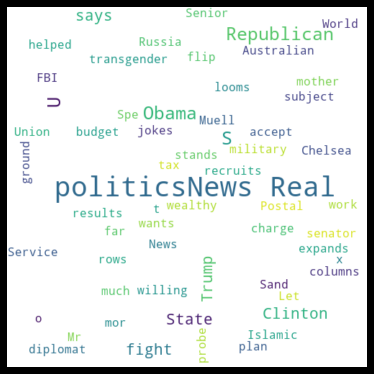

In [20]:
word_cloud(true_politics)

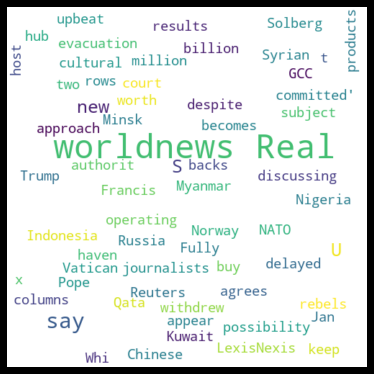

In [21]:
word_cloud(true_world)

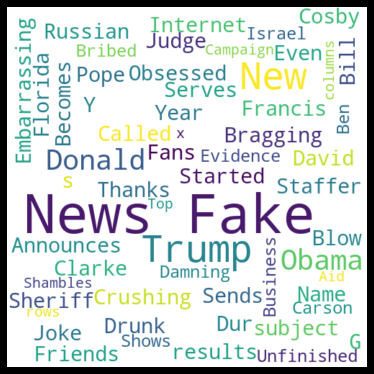

In [22]:
word_cloud(fake_news)

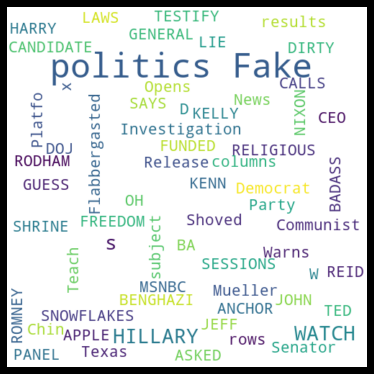

In [23]:
word_cloud(fake_politics)

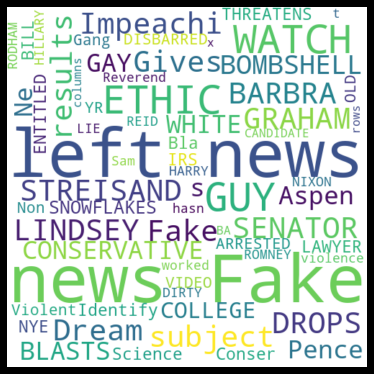

In [24]:
word_cloud(fake_leftNews)

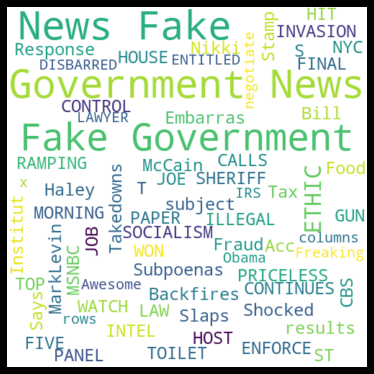

In [25]:
word_cloud(fake_govNews)

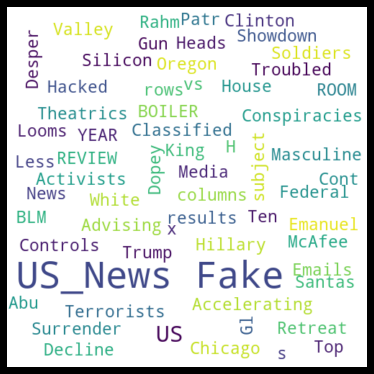

In [26]:
word_cloud(fake_usNews)

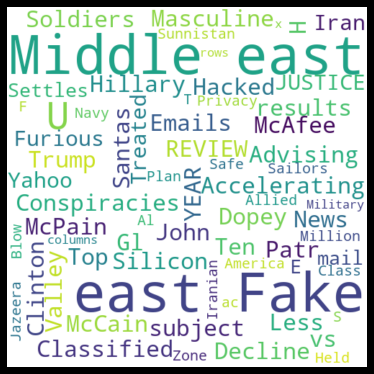

In [27]:
word_cloud(middle_east)

In [28]:
#Let's check the most used word in the true news and fake news after filtering the words
true_news_analysis = news_dataframe[news_dataframe['results']=='Real']
fake_news_analysis = news_dataframe[news_dataframe['results']=='Fake']

In [29]:
most_occurence_true = Counter(" ".join(true_news_analysis["News"]).split()).most_common(10)

In [30]:
labels,numbers = zip(*most_occurence_true) #Zipping the data to make the tuples

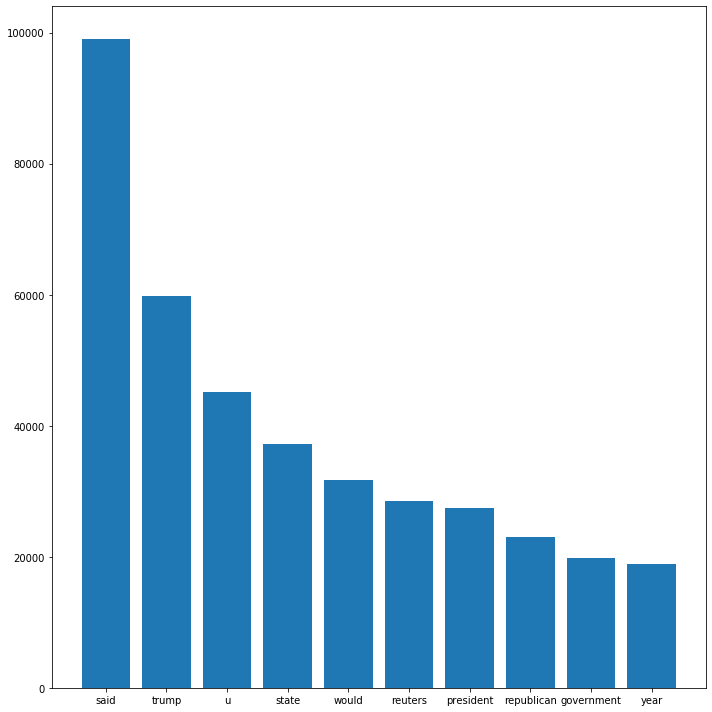

In [31]:
#Plotting the tuples in the bar plot
plt.figure(figsize=(10,10))
x_axis = np.arange(len(labels)) 
plt.bar(x_axis, numbers,width=0.8, align='center')
plt.xticks(x_axis, labels)
plt.tight_layout()
plt.show()

In [32]:
news_dataframe = news_dataframe.dropna()

In [33]:
words = ' '.join(news_dataframe['News'])

In [34]:
words = word_tokenize(words)

### N-gram Analysis - Bigram and Tigram


##### In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.


In [35]:
#Using n grams and using TF-IDF vectorizer to count the occurence
#Using bi grams
bi_gram = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

In [36]:
#Using tri grams
tri_gram = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

Text(0.5, 0, 'No of Occurances')

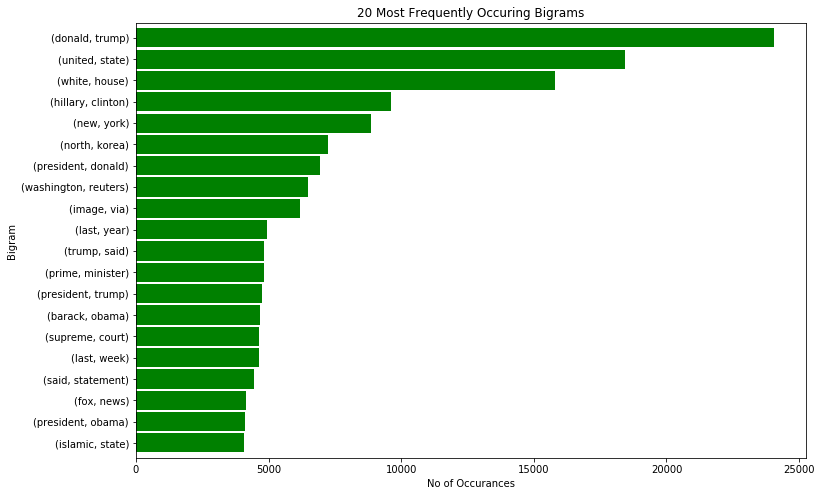

In [37]:
#Visualising the n grams using bar plot
#bigrams
bi_gram.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('No of Occurances')

Text(0.5, 0, 'No of Occurances')

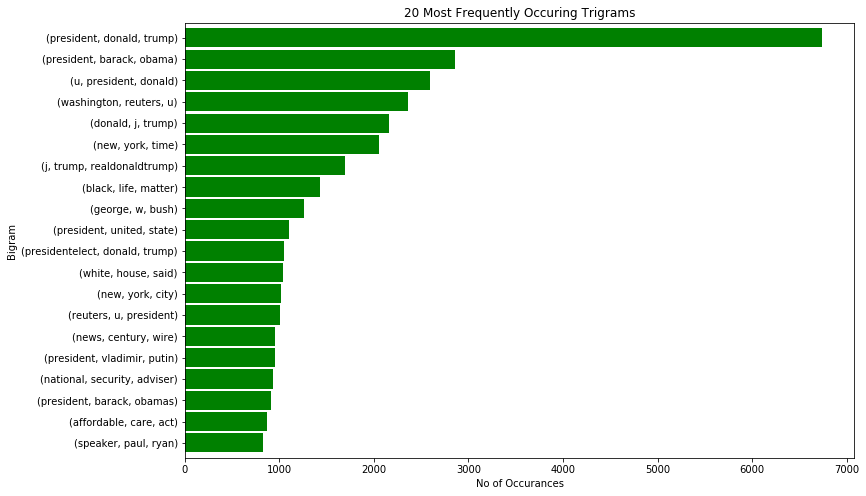

In [38]:
#Visualising the n grams using bar plot
#trigrams
tri_gram.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Bigram')
plt.xlabel('No of Occurances')

In [39]:
#Shuffeling the data
final_news_dataframe = shuffle(news_dataframe)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(final_news_dataframe['News'],final_news_dataframe.results,random_state=0)

In [42]:
model_eng = Pipeline([('vect', CountVectorizer(ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [43]:
model = model_eng.fit(X_train, Y_train)

In [44]:
prediction = model.predict(X_test)

In [46]:
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 98.72%
